In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("economic_index.csv", delimiter=",")

In [30]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [31]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [32]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [33]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

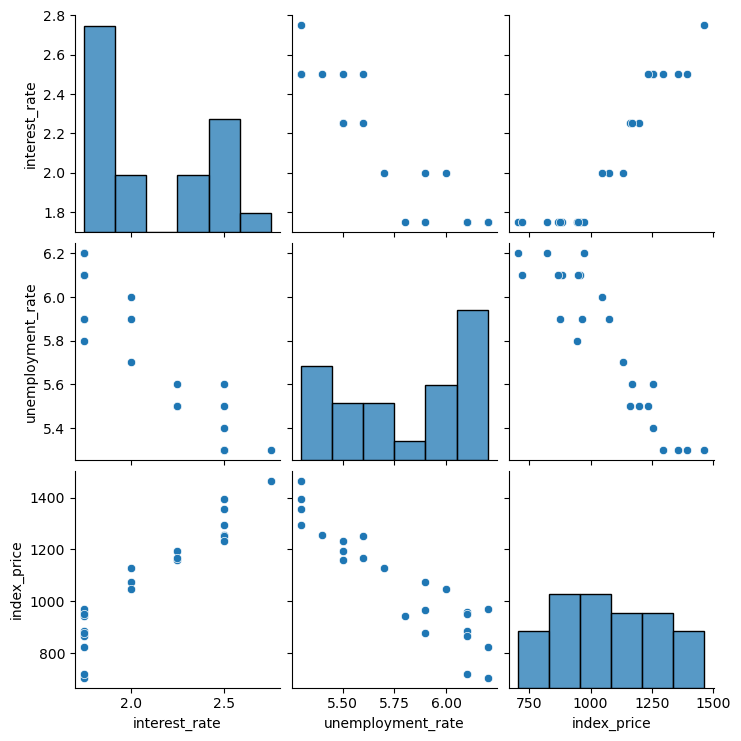

In [34]:
# SEaborn paiplot
sns.pairplot(df)

In [35]:
# Checking Correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


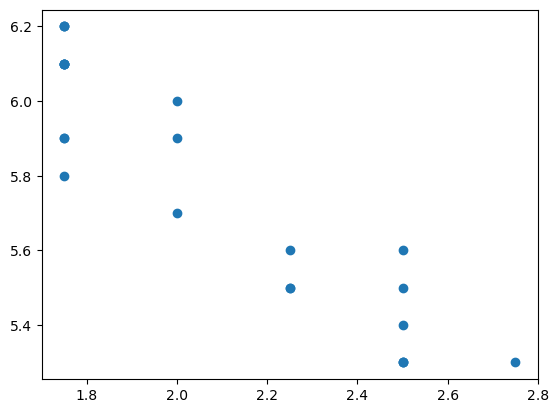

In [38]:
# Visulaize data points
plt.scatter(df["interest_rate"], df["unemployment_rate"])

In [43]:
# X = df[["interest_rate", "unemployment_rate"]]

X = df.iloc[:, :-1]  # Removing Last Column Which is Output/dependent Feature
y = df.iloc[:, -1]

X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [44]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [46]:
print(X.shape, y.shape)

(24, 2) (24,)


In [47]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

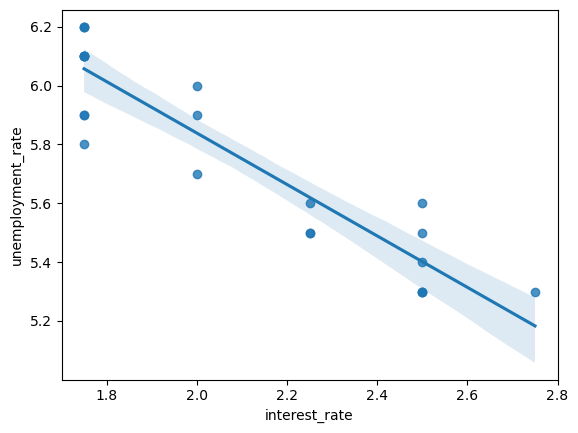

In [51]:
# Important regplot	[Scatter Plot + Regression Line]
sns.regplot(x="interest_rate", y="unemployment_rate", data=df)

In [52]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Applying Linear Regression Model
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [55]:
# Cross   Validation
from sklearn.model_selection import cross_val_score

crossvalidation_score = cross_val_score(
    regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3
)
# It hyper tunes my model by training data 3 more times for accuracy
crossvalidation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [56]:
np.mean(crossvalidation_score)

-5914.828180162388

In [57]:
# Predicting Data
y_pred = regression.predict(X_test)

In [58]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [59]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

5793.76288771258 59.93578152323554 76.11677139574813


In [61]:
# RSquare and Adjusted R Square
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

adjusted_r2_score = 1 - (
    (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
)

print(f"R2 Score: {score} \nAdjusted R2 Score: {adjusted_r2_score}")

R2 Score: 0.8278978091457142 
Adjusted R2 Score: 0.713163015242857


# *Assumptions*
### [To Check Whether Model Has Performed Well or Not]

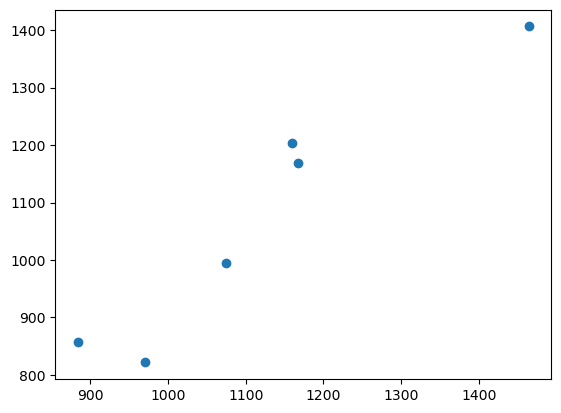

In [62]:
plt.scatter(y_test, y_pred) # If Graph Comes in Linear Relationship Then Model Good

In [75]:
# Errors or Residuals
residuals = y_pred - y_test
print(residuals)

8      45.227704
16   -149.349481
0     -57.486996
18    -26.291104
11    -80.090077
9       1.169327
Name: index_price, dtype: float64


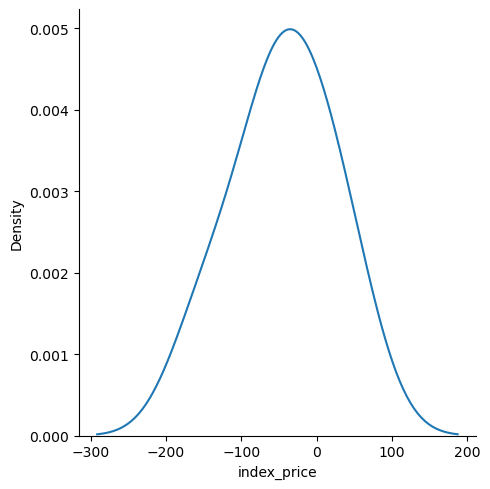

In [76]:
# Plot the Residuals	[If Normal Distribution Comes Then Model is Good]
sns.displot(residuals, kind="kde")

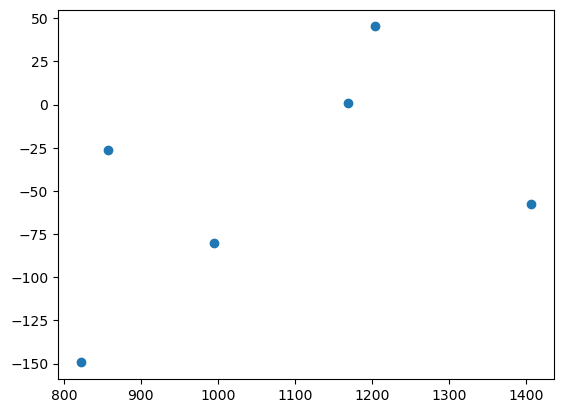

In [77]:
# Scatter Plot Prediction and Residuals
plt.scatter(y_pred, residuals)
# Uniform Distribution Means No PATTERNs are Observed and Model Good

# Linear Regression OLS

In [78]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [79]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [80]:
print(model.summary())  # Compare coefficient with regression.coef_

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 03 May 2025   Prob (F-statistic):                       0.754
Time:                        15:48:06   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [81]:
print(f"Regression Coefficient: {regression.coef_}")

Regression Coefficient: [  88.27275507 -116.25716066]


In [82]:
# Predicting any New Data
regression.predict(scaler.transform([["2.75", "5.4"]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1370.45462663])